In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn, scipy, glob
from nilearn import input_data, datasets
from nilearn import datasets, plotting
from nilearn.image import new_img_like, load_img, get_data
from nilearn.interfaces.fmriprep import load_confounds


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
import os, glob
os.getcwd()
import shutil
mylist = [f for f in glob.glob("../data/03_extract_ts/sub*")]
len(mylist) #[-84:65]

289

In [3]:
ts_data = []
for curr_file in mylist:
    ts_data.append(np.load(curr_file))
    
ts_data = np.asarray(ts_data)
ts_data.shape

(289, 380, 293)

In [4]:
nsubjs = np.int(ts_data.shape[0]/2)
ts_data1 = np.mean(ts_data[:nsubjs , :, :], axis = 0)
ts_data2 = np.mean(ts_data[nsubjs: , :, :], axis = 0)
r = 56
#res.append( np.corrcoef(ts_data1[:,r], ts_data2[:,r])[0,1])
np.corrcoef(ts_data1[:,r], ts_data2[:,r])[0,1]

0.9474024495169955

0.9474024495169955

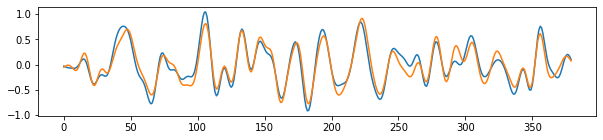

In [5]:
plt.figure(figsize = (10,2))
plt.plot(ts_data1[:,r]);
plt.plot(ts_data2[:,r]);
np.corrcoef(ts_data1[:,r], ts_data2[:,r])[0,1]

In [8]:
old_data = np.load('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_PUBLISHED/medianeuroscience_project/data/ts_array_shen268_regional_average_ages13-99.npy')

In [9]:
old_data.shape

(33, 168, 268)

In [10]:
ts_data.shape

(289, 380, 293)

In [11]:
mts = np.mean(ts_data, axis=0)
mts.shape # Tr = 0.8

(380, 293)

In [12]:
mold = np.mean(old_data, axis = 0)
mold.shape #tr= 1.5?

(168, 268)

In [15]:
#df = pd.read_csv('/Users/ralfschmaelzle/Desktop/onset.tsv', sep ='\t')
#onsets = df.onset[(df.trial_type =='pain')].values
#onsets

#(df.trial_type =='social') | (df.trial_type =='mental')

In [133]:
#Pain Event Onsets; Durations 
#38; 2 
#49; 1 
#56; 2 
#71; 5 
#100; 2 
#108; 6 
#117; 3 
#134; 3 
#159; 2



In [16]:
380*0.8

304.0

In [18]:
#vals = (onsets / 0.8)
#vals

In [19]:
'''r = 41

plt.figure(figsize = (10,2))
plt.plot(mts[:,r],  color = 'red', label = 'australia');
#plt.plot(scipy.signal.resample(mold[:,r], 380, ),  color = 'blue', label = 'mit');
for val in vals:
    plt.axvline(val)

plt.legend(); plt.show();
    
#plt.figure(figsize = (10,2))
#plt.plot(scipy.signal.resample(mts[:,r], 168),  color = 'red', label = 'australia');
#plt.plot(mold[1:,r],  color = 'blue', label = 'mit');
#plt.legend(); plt.show();'''

"r = 41\n\nplt.figure(figsize = (10,2))\nplt.plot(mts[:,r],  color = 'red', label = 'australia');\n#plt.plot(scipy.signal.resample(mold[:,r], 380, ),  color = 'blue', label = 'mit');\nfor val in vals:\n    plt.axvline(val)\n\nplt.legend(); plt.show();\n    \n#plt.figure(figsize = (10,2))\n#plt.plot(scipy.signal.resample(mts[:,r], 168),  color = 'red', label = 'australia');\n#plt.plot(mold[1:,r],  color = 'blue', label = 'mit');\n#plt.legend(); plt.show();"

In [20]:
# res, res1 = scipy.signal.resample(mold[:,r], 380, t =np.arange(0, 2*168, 2))
# res.shape

In [21]:
#scipy.signal.resample?

In [22]:
mold[:,r].shape


(168,)

In [23]:
np.arange(0, 2*168, 2)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334])

In [24]:
0.8*380

304.0

In [26]:
#res1

In [27]:
resampled_x = scipy.signal.resample(mold[:,r], 380)
resampled_x.shape

(380,)

In [28]:
mts.shape

(380, 293)

In [29]:
from nilearn import input_data, datasets
all293_rois_file       = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/partlycloudy_twins/data/02_rois_masks_maps/allcombined.nii'
all293_masker = input_data.NiftiLabelsMasker(all293_rois_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 0.8, 
                                             low_pass    = 0.12 );
all293_masker.fit('/Volumes/Backup Plus/twins_fmriprep/sub-0001/ses-02/func/sub-0001_ses-02_task-partlycloudy_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

NiftiLabelsMasker(detrend=True, high_pass=0.01,
                  labels_img='/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/partlycloudy_twins/data/02_rois_masks_maps/allcombined.nii',
                  low_pass=0.12, standardize=True, t_r=0.8)

In [30]:
ts_data.shape

(289, 380, 293)

In [31]:
rs = []
for currreg in range(293):

    nsubjs = np.int(ts_data.shape[0]/2)
    ts_data1 = np.mean(ts_data[:nsubjs , :, :], axis = 0)
    ts_data2 = np.mean(ts_data[nsubjs: , :, :], axis = 0)

    #res.append( np.corrcoef(ts_data1[:,r], ts_data2[:,r])[0,1])
    rs.append(np.corrcoef(ts_data1[:,currreg], ts_data2[:,currreg])[0,1])
rs = np.asarray(rs)
rs.shape

(293,)

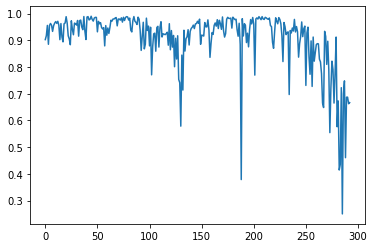

In [32]:
plt.plot(rs)

In [33]:
brainisc = all293_masker.inverse_transform(np.reshape(rs, (1,293)))
brainisc

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



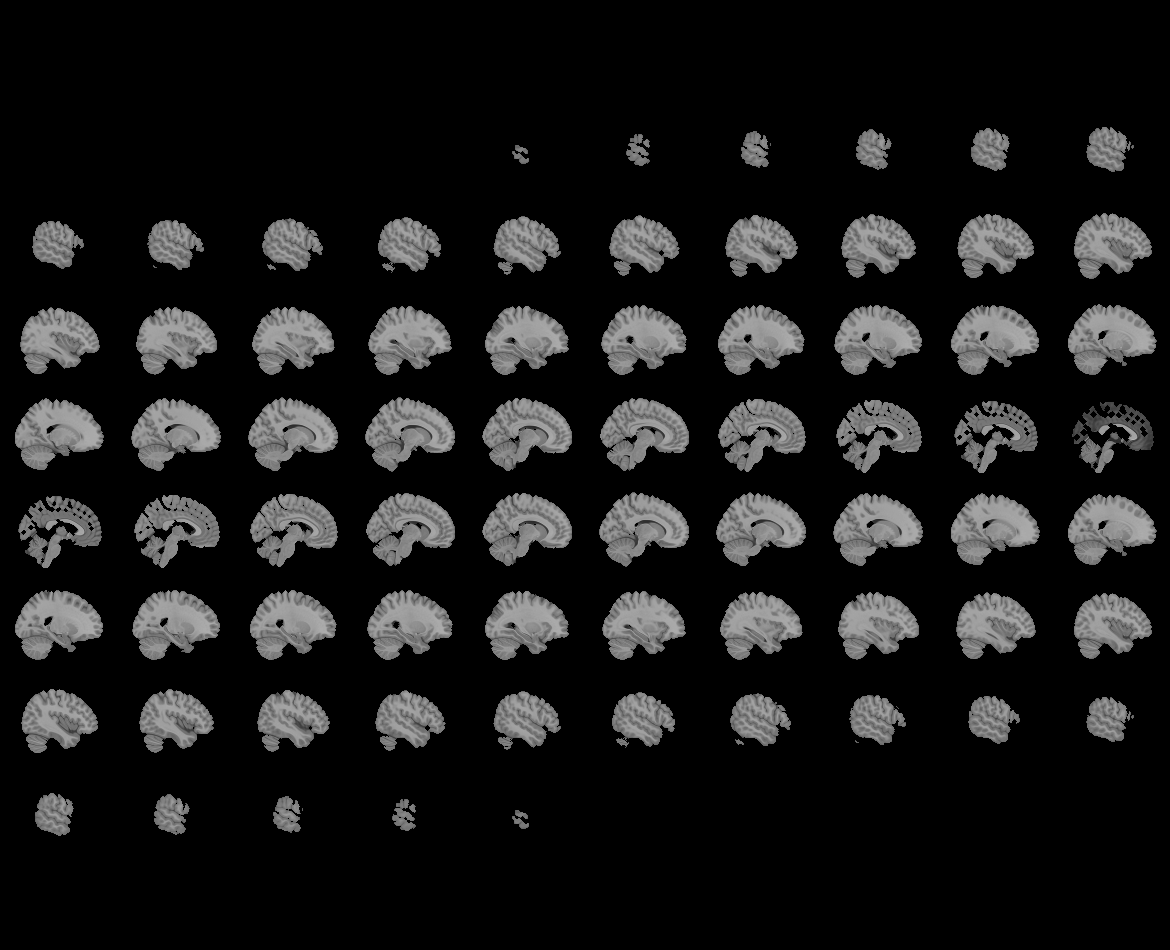
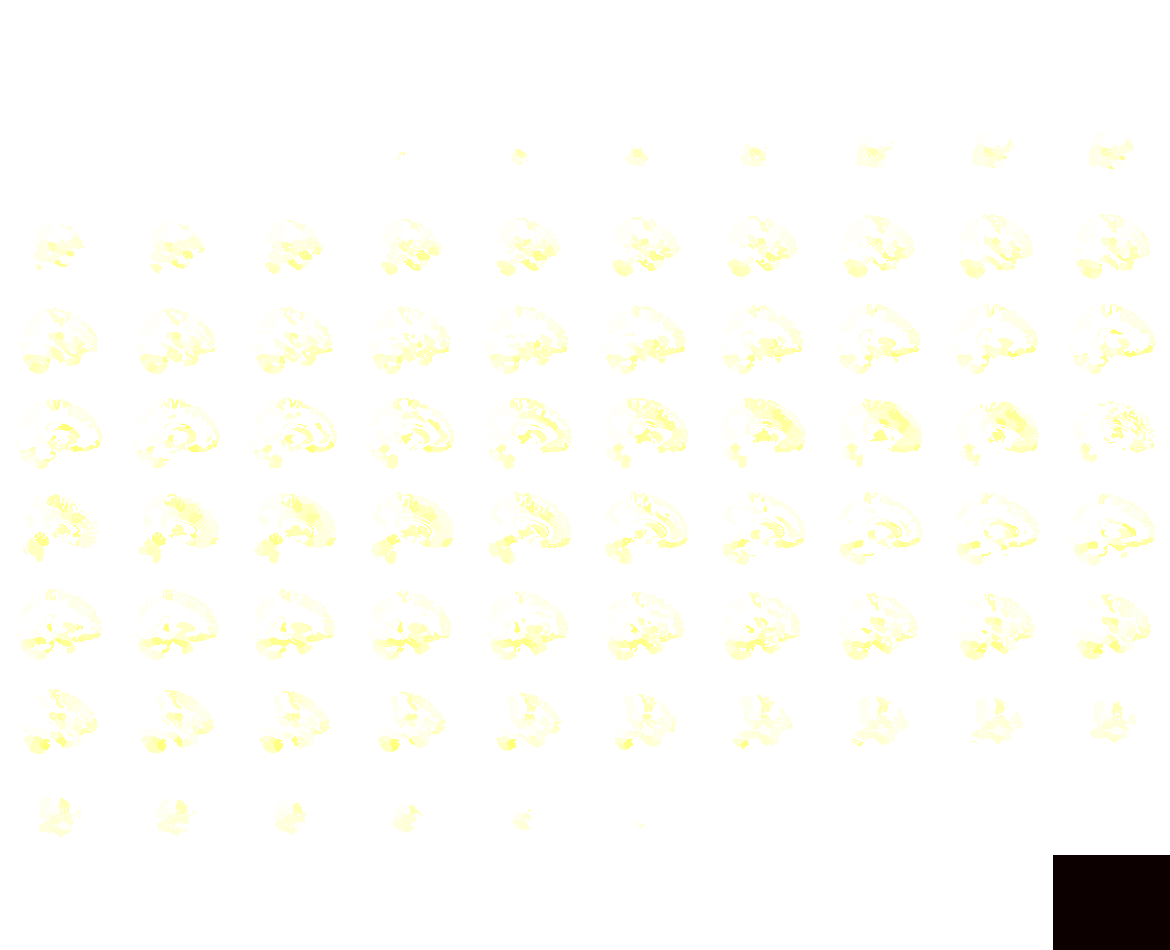

In [34]:
view = nilearn.plotting.view_img(brainisc, threshold = 0.85)
view

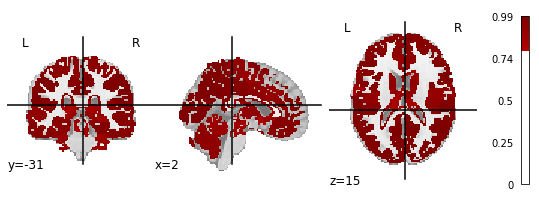

In [35]:
nilearn.plotting.plot_stat_map(brainisc, cmap = 'seismic', threshold = 0.8)